In [9]:
from transformers import BertModel, BertTokenizer
import torch

import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.colors import LinearSegmentedColormap

import pandas as pd
import numpy as np

In [2]:
def get_bert_embeddings(model, tokenizer, text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    embeddings = outputs.last_hidden_state[:, 0, :]
    return embeddings

def cosine_similarity(vec1, vec2):
    cos_sim = torch.nn.functional.cosine_similarity(vec1, vec2)
    return cos_sim

tokenizer = BertTokenizer.from_pretrained('bert-base-chinese')
model = BertModel.from_pretrained('bert-base-chinese')


In [20]:
df = pd.read_excel('data.xlsx', sheet_name='similarity')

base_contents = df.loc[0:5, 'content']  
compare_contents = df.loc[6:23, 'content'] 

results = pd.DataFrame(index=range(1, 7), columns=range(7, 25))

for i, base_content in enumerate(base_contents):
    base_vec = get_bert_embeddings(model, tokenizer, base_content)
    for j, compare_content in enumerate(compare_contents):
        compare_vec = get_bert_embeddings(model, tokenizer, compare_content)
        similarity = cosine_similarity(base_vec, compare_vec)
        results.loc[i+1, j+7] = round(similarity.item(), 2)
        
print(results)


     7     8     9     10    11    12    13    14    15    16    17    18  \
1  0.72  0.71  0.73  0.74  0.69  0.74  0.66   0.7  0.66   0.7  0.64  0.72   
2  0.68  0.74  0.75  0.81  0.67  0.78   0.6  0.74  0.67  0.74  0.61  0.77   
3  0.72  0.76  0.77  0.85  0.73   0.8  0.64  0.84  0.73  0.83  0.67  0.85   
4  0.64  0.67  0.67  0.71  0.66  0.68  0.62  0.74  0.64  0.75  0.62  0.71   
5  0.71  0.71   0.7  0.77  0.65  0.81  0.65  0.71  0.69   0.7  0.65  0.75   
6  0.68  0.66  0.66  0.71  0.65  0.68  0.64  0.71  0.68   0.7  0.66  0.69   

     19    20    21    22    23    24  
1  0.78  0.81  0.76  0.68  0.75  0.72  
2  0.68  0.83  0.79  0.83  0.76  0.78  
3  0.65  0.83  0.79  0.85  0.78  0.81  
4  0.62  0.75  0.71  0.83   0.7  0.71  
5  0.73  0.76  0.79  0.74  0.75  0.78  
6  0.71  0.79  0.72  0.68  0.69  0.64  


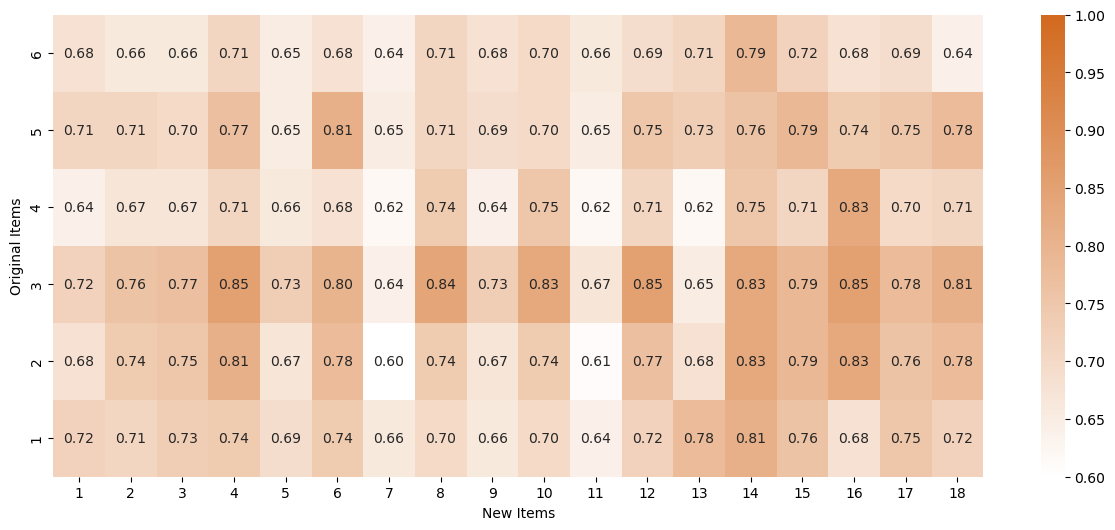

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

results_reversed_new = results.iloc[::-1]

results_reversed_new = results_reversed_new.astype(float)
plt.figure(figsize=(15, 6))

cmap = LinearSegmentedColormap.from_list('custom_reds', ['white', '#D2691E'])

sns.heatmap(results_reversed_new, annot=True, fmt=".2f", cmap=cmap, cbar=True, vmin=0.6, vmax=1, center=(0.6+1)/2)

plt.xlabel('New Items')
plt.ylabel('Original Items')

labels = list(range(1, 19))  
plt.xticks(ticks=np.arange(18) + 0.5, labels=labels, rotation=0)

plt.show()

In [29]:
df = pd.read_excel('data.xlsx', sheet_name='similarity')

base_contents = df.loc[0:5, 'content'] 
compare_contents = df.loc[24:41, 'content'] 

results = pd.DataFrame(index=range(1, 7), columns=range(7, 25))

for i, base_content in enumerate(base_contents):
    base_vec = get_bert_embeddings(model, tokenizer, base_content)
    for j, compare_content in enumerate(compare_contents):
        compare_vec = get_bert_embeddings(model, tokenizer, compare_content)
        similarity = cosine_similarity(base_vec, compare_vec)
        results.loc[i+1, j+7] = round(similarity.item(), 2)
        
print(results)

     7     8     9     10    11    12    13    14    15    16    17    18  \
1   0.8  0.67  0.81  0.76  0.77  0.73  0.72  0.77  0.74  0.73  0.71  0.71   
2   0.8  0.83  0.76  0.85  0.81  0.86  0.84  0.83  0.83  0.84   0.8  0.82   
3  0.79  0.85  0.75  0.88  0.78  0.87  0.89  0.84  0.85  0.92  0.87  0.91   
4  0.71  0.86  0.68  0.79  0.72  0.78  0.82  0.78   0.8  0.84  0.81  0.82   
5  0.73   0.7  0.78  0.83  0.81  0.79  0.75  0.77  0.77  0.75  0.74  0.73   
6  0.73  0.63  0.75  0.73  0.71  0.72  0.75  0.76  0.78  0.74  0.75  0.73   

     19    20    21    22    23    24  
1  0.78  0.74  0.75   0.8  0.72  0.71  
2  0.88  0.84  0.86  0.82  0.86  0.81  
3  0.89  0.85  0.87  0.82  0.88  0.83  
4  0.82  0.83  0.79  0.75  0.87   0.8  
5  0.78   0.8  0.78  0.84  0.76  0.77  
6  0.78  0.75  0.74  0.76  0.72   0.7  


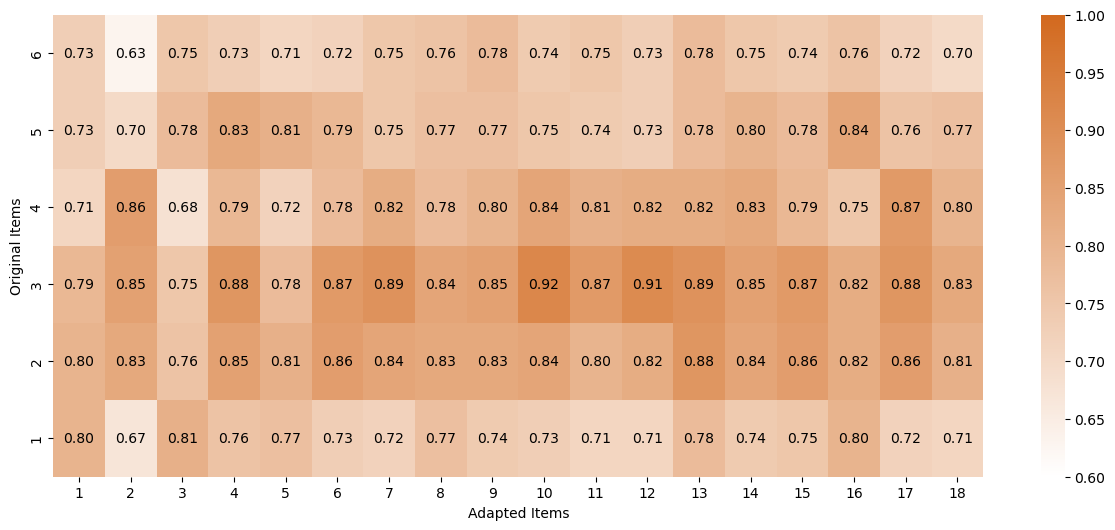

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

results_reversed_adapted = results.iloc[::-1]

results_reversed_adapted = results_reversed_adapted.astype(float)
plt.figure(figsize=(15, 6))

cmap = LinearSegmentedColormap.from_list('custom_reds', ['white', '#D2691E'])

sns.heatmap(
    results_reversed_adapted,
    annot=True,
    fmt=".2f",
    cmap=cmap,
    cbar=True,
    vmin=0.6,
    vmax=1,
    center=(0.6 + 1) / 2,
    annot_kws={"color": "black"} 
)

plt.xlabel('Adapted Items')
plt.ylabel('Original Items')

labels = list(range(1, 19))  
plt.xticks(ticks=np.arange(18) + 0.5, labels=labels, rotation=0)
plt.yticks(rotation=90) 

plt.show()


In [22]:
df = pd.read_excel('data.xlsx', sheet_name='similarity')

base_contents = df.loc[6:23, 'content']  
compare_contents = df.loc[6:23, 'content'] 

results = pd.DataFrame(index=range(7, 25), columns=range(7, 25))
        
for i, base_content in enumerate(base_contents, start=7):
    base_vec = get_bert_embeddings(model, tokenizer, base_content)
    for j, compare_content in enumerate(compare_contents, start=7):
        compare_vec = get_bert_embeddings(model, tokenizer, compare_content)
        similarity = cosine_similarity(base_vec, compare_vec)
        results.loc[i, j] = round(similarity.item(), 2)
    
results_reversed1 = results.iloc[::-1]
results_reversed1

,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
24,0.72,0.79,0.81,0.85,0.77,0.88,0.67,0.77,0.78,0.78,0.7,0.86,0.75,0.79,0.9,0.86,0.86,1.0
23,0.78,0.77,0.81,0.79,0.82,0.84,0.67,0.76,0.74,0.76,0.68,0.81,0.78,0.82,0.88,0.8,1.0,0.86
22,0.67,0.74,0.76,0.8,0.72,0.81,0.61,0.75,0.73,0.78,0.66,0.79,0.67,0.78,0.83,1.0,0.8,0.86
21,0.77,0.8,0.78,0.82,0.8,0.89,0.67,0.77,0.76,0.8,0.7,0.83,0.77,0.84,1.0,0.83,0.88,0.9
20,0.79,0.76,0.75,0.8,0.8,0.83,0.65,0.78,0.69,0.81,0.65,0.81,0.73,1.0,0.84,0.78,0.82,0.79
19,0.73,0.69,0.71,0.71,0.69,0.77,0.72,0.67,0.7,0.65,0.69,0.7,1.0,0.73,0.77,0.67,0.78,0.75
18,0.81,0.87,0.8,0.92,0.84,0.88,0.67,0.9,0.82,0.89,0.78,1.0,0.7,0.81,0.83,0.79,0.81,0.86
17,0.77,0.77,0.71,0.74,0.76,0.73,0.79,0.83,0.9,0.79,1.0,0.78,0.69,0.65,0.7,0.66,0.68,0.7
16,0.78,0.85,0.76,0.82,0.84,0.8,0.67,0.9,0.82,1.0,0.79,0.89,0.65,0.81,0.8,0.78,0.76,0.78
15,0.75,0.81,0.74,0.8,0.76,0.76,0.74,0.83,1.0,0.82,0.9,0.82,0.7,0.69,0.76,0.73,0.74,0.78


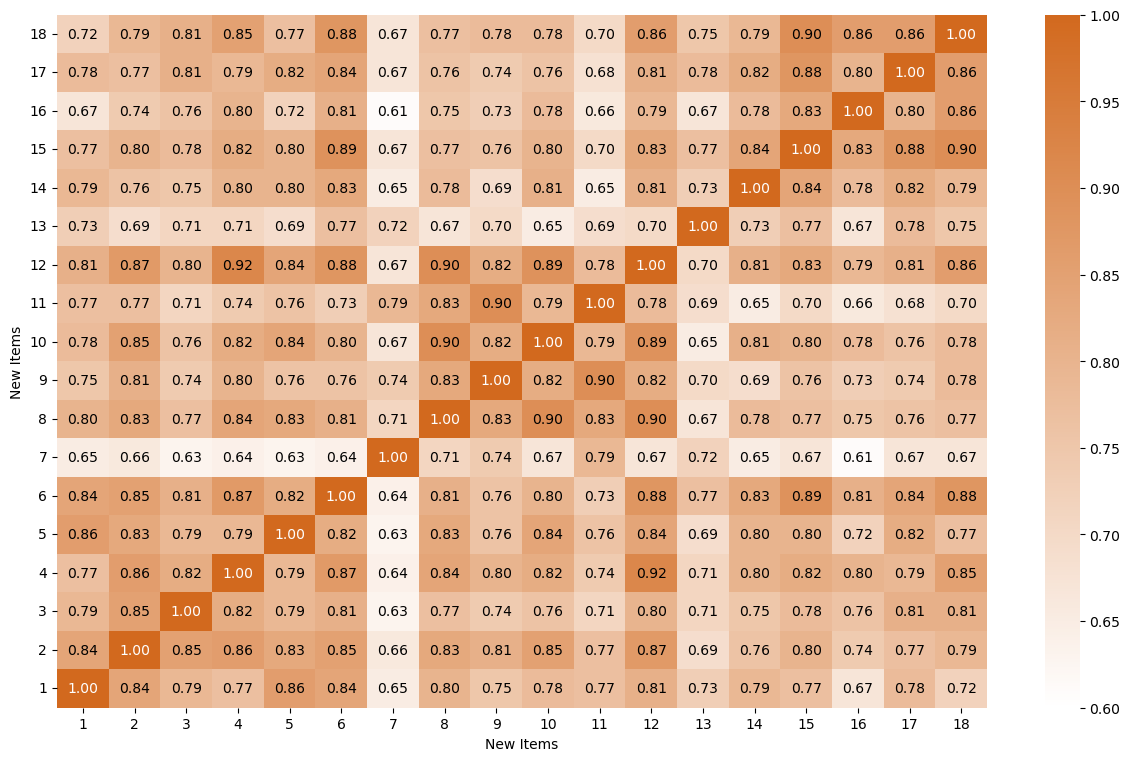

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

results_reversed1 = results_reversed1.astype(float)
plt.figure(figsize=(15, 9))

cmap = LinearSegmentedColormap.from_list('custom_reds', ['white', '#D2691E'])

# Create the heatmap
ax = sns.heatmap(
    results_reversed1,
    annot=True,
    fmt=".2f",
    cmap=cmap,
    cbar=True,
    vmin=0.6,
    vmax=1,
    center=(0.6+1)/2,
    annot_kws={"color": "black"}
)

for t in ax.texts:
    if float(t.get_text()) == 1.0:
        t.set_color('white')

# Set labels and ticks
plt.xlabel('New Items')
plt.ylabel('New Items')

labels1 = list(range(1, 19)) 
plt.xticks(ticks=np.arange(18) + 0.5, labels=labels1, rotation=0)
labels2 = list(range(18, 0, -1)) 
plt.yticks(ticks=np.arange(18) + 0.5, labels=labels2, rotation=0)

plt.show()


In [26]:
df = pd.read_excel('data.xlsx', sheet_name='similarity')

base_contents = df.loc[24:41, 'content']  
compare_contents = df.loc[24:41, 'content'] 

results = pd.DataFrame(index=range(24, 42), columns=range(24, 42))
        
for i, base_content in enumerate(base_contents, start=24):
    base_vec = get_bert_embeddings(model, tokenizer, base_content)
    for j, compare_content in enumerate(compare_contents, start=24):
        compare_vec = get_bert_embeddings(model, tokenizer, compare_content)
        similarity = cosine_similarity(base_vec, compare_vec)
        results.loc[i, j] = round(similarity.item(), 2)
    
results_reversed = results.iloc[::-1]
results_reversed

,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
41,0.77,0.82,0.76,0.84,0.82,0.8,0.84,0.84,0.85,0.82,0.82,0.84,0.85,0.96,0.82,0.89,0.85,1.0
40,0.78,0.89,0.73,0.87,0.79,0.85,0.85,0.84,0.86,0.86,0.85,0.85,0.89,0.88,0.84,0.81,1.0,0.85
39,0.83,0.75,0.84,0.87,0.84,0.83,0.84,0.84,0.82,0.81,0.81,0.82,0.86,0.89,0.84,1.0,0.81,0.89
38,0.82,0.83,0.76,0.88,0.79,0.91,0.87,0.81,0.82,0.88,0.77,0.86,0.91,0.84,1.0,0.84,0.84,0.82
37,0.79,0.82,0.78,0.86,0.8,0.81,0.87,0.86,0.87,0.85,0.86,0.85,0.87,1.0,0.84,0.89,0.88,0.96
36,0.88,0.83,0.81,0.88,0.8,0.88,0.87,0.85,0.87,0.87,0.84,0.88,1.0,0.87,0.91,0.86,0.89,0.85
35,0.81,0.83,0.76,0.88,0.79,0.86,0.92,0.83,0.87,0.95,0.89,1.0,0.88,0.85,0.86,0.82,0.85,0.84
34,0.75,0.78,0.76,0.84,0.76,0.78,0.85,0.83,0.88,0.87,1.0,0.89,0.84,0.86,0.77,0.81,0.85,0.82
33,0.79,0.84,0.76,0.89,0.79,0.88,0.93,0.84,0.86,1.0,0.87,0.95,0.87,0.85,0.88,0.81,0.86,0.82
32,0.79,0.79,0.74,0.86,0.8,0.81,0.87,0.89,1.0,0.86,0.88,0.87,0.87,0.87,0.82,0.82,0.86,0.85


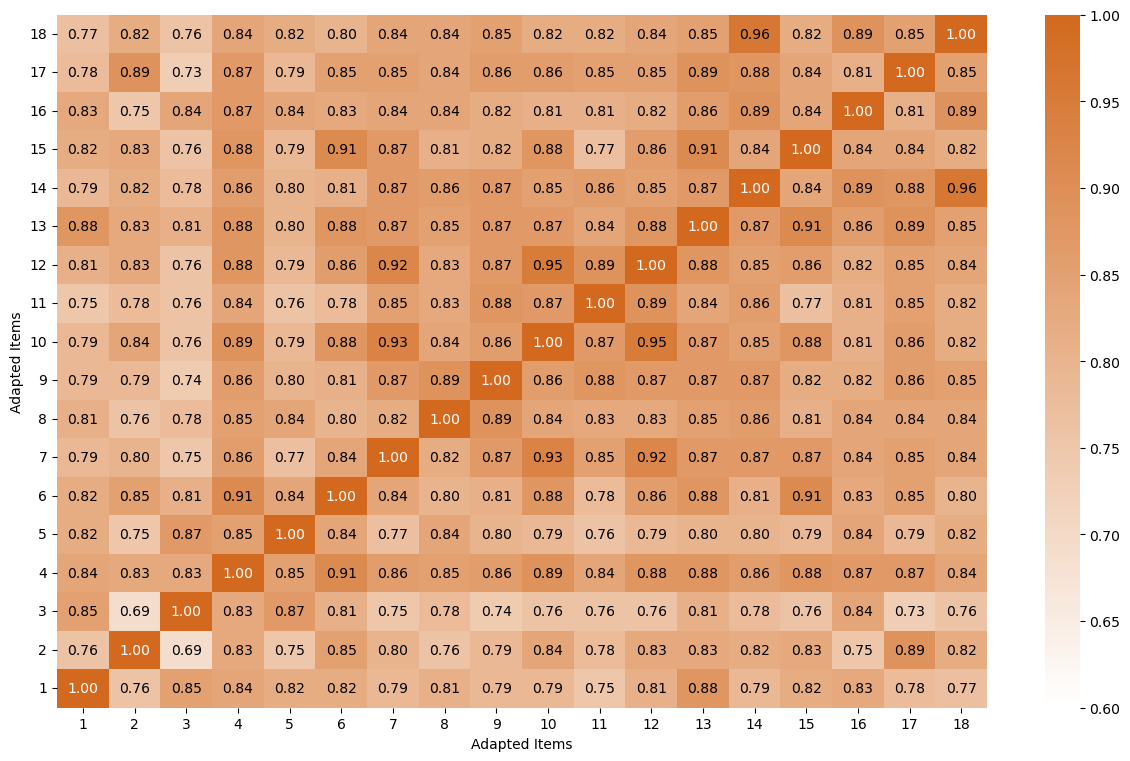

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

results_reversed = results_reversed.astype(float)
plt.figure(figsize=(15, 9))

cmap = LinearSegmentedColormap.from_list('custom_reds', ['white', '#D2691E'])

# Create the heatmap
ax = sns.heatmap(
    results_reversed,
    annot=True,
    fmt=".2f",
    cmap=cmap,
    cbar=True,
    vmin=0.6,
    vmax=1,
    center=(0.6+1)/2,
    annot_kws={"color": "black"}  
)

for t in ax.texts:
    if float(t.get_text()) == 1.0:
        t.set_color('white')

plt.xlabel('Adapted Items')
plt.ylabel('Adapted Items')

labels1 = list(range(1, 19))  
plt.xticks(ticks=np.arange(18) + 0.5, labels=labels1, rotation=0)
labels2 = list(range(18, 0, -1))  
plt.yticks(ticks=np.arange(18) + 0.5, labels=labels2, rotation=0)

plt.show()
